In [0]:
!mkdir -p turmas
!mkdir -p matriculas
!mv turmas*.csv turmas/
!mv matriculas*.csv matriculas/

In [6]:
import pandas as pd
import re

componentes = pd.read_csv("componentes.csv", sep=';', error_bad_lines=False)

componentes = componentes[componentes['nome'].notna()]
componentes = componentes[componentes['pre_requisito'].notna()]
#componentes = componentes[componentes['nome'].str.contains('linear', case=False)]
#MAT0309

#drops unecessary columns
componentes = componentes.drop(columns=['ch_teorico', 'ch_pratico',
                                       'ch_estagio', 'ch_total', 'ch_dedicada_docente',
                                       'ch_ead', 'cr_max_ead', 'permite_horario_flexivel',
                                       'qtd_unidades', 'procedimentos_avaliacao',
                                       'ementa', 'conteudo', 'competencias_habilidades',
                                       'ano_programa', 'modalidade', 'curso_componente',
                                       'referencias', 'bibliografia', 'objetivos', 'Unnamed: 29'])

#selects algebra linear para computação
al_codigo = 'MAT0309'

al_comp = componentes[componentes['codigo'] == al_codigo]
al_comp['id_componente'] = al_comp['id_componente'].astype('int32')

dependentes = componentes[componentes['pre_requisito'].str.contains(al_codigo)]
dependentes['id_componente'] = dependentes['id_componente'].astype('int32')

dependentes

b'Skipping line 8475: expected 30 fields, saw 33\nSkipping line 11978: expected 30 fields, saw 33\nSkipping line 11986: expected 30 fields, saw 31\nSkipping line 12281: expected 30 fields, saw 37\nSkipping line 12561: expected 30 fields, saw 34\nSkipping line 15331: expected 30 fields, saw 38\nSkipping line 15756: expected 30 fields, saw 34\nSkipping line 19270: expected 30 fields, saw 31\nSkipping line 21144: expected 30 fields, saw 31\nSkipping line 25719: expected 30 fields, saw 31\nSkipping line 25742: expected 30 fields, saw 34\nSkipping line 27670: expected 30 fields, saw 37\nSkipping line 28966: expected 30 fields, saw 31\nSkipping line 28967: expected 30 fields, saw 31\nSkipping line 31168: expected 30 fields, saw 32\nSkipping line 31472: expected 30 fields, saw 34\nSkipping line 31505: expected 30 fields, saw 36\n'
b'Skipping line 36017: expected 30 fields, saw 33\nSkipping line 36063: expected 30 fields, saw 34\nSkipping line 38672: expected 30 fields, saw 31\nSkipping line 3

,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel,equivalencia,pre_requisito,co_requisito,periodo_programa
5302,23558,DISCIPLINA,DIM0404,G,CALCULO NUMERICO PARA CIENCIA DA COMPUTACAO,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,( DIM0040 ),( ( MAT0312 OU MAT0346 ) E ( MAT0343 ) ) OU ( ...,NaN,1
38462,2040950,DISCIPLINA,DIM0451,G,COMPUTAÇÃO GRÁFICA I,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,( DIM0435 ) OU ( DIM0102 ) OU ( DCA0114 ),( DIM0404 ) OU ( IMD0024 E IMD0039 E MAT0309 E...,NaN,1


In [15]:
#reads all classes from 2014 to 2018
turmas_by_sem = {}
semesters = ['2014.1', '2014.2', '2015.1', '2015.2',
            '2016.1', '2016.2', '2017.1', '2017.2',
            '2018.1', '2018.2']
for sem in semesters:
  turmas_by_sem[sem] = pd.read_csv('turmas/turmas-' + sem + '.csv', sep=";")
  
  #cleans data
  turmas_by_sem[sem] = turmas_by_sem[sem][turmas_by_sem[sem]['id_componente_curricular'].notna()]
  turmas_by_sem[sem]['id_componente_curricular'] = turmas_by_sem[sem]['id_componente_curricular'].astype('int32')
  
  #filters desired classes
  turmas_by_sem[sem] = turmas_by_sem[sem][(turmas_by_sem[sem]['id_componente_curricular'] ==
      int(al_comp['id_componente'])) |
      (turmas_by_sem[sem]['id_componente_curricular'].isin(
      dependentes['id_componente'].tolist()) )]
  
  #removes unecessary columns
  turmas_by_sem[sem] = turmas_by_sem[sem].drop(columns=['id_docente_interno',
                           'id_docente_externo', 'observacao', 'nivel_ensino',
                           'campus_turma', 'data_inicio', 'data_fim',
                           'descricao_horario', 'total_solicitacoes',
                           'capacidade_aluno', 'tipo', 'distancia',
                           'data_consolidacao', 'agrupadora',
                           'id_turma_agrupadora', 'qtd_aulas_lancadas',
                           'situacao_turma', 'convenio',
                           'modalidade_participantes'])
  if 'Unnamed: 25' in turmas_by_sem[sem].columns:
    turmas_by_sem[sem] = turmas_by_sem[sem].drop(columns=['Unnamed: 25'])
  
#merges tables
turmas = pd.concat(turmas_by_sem)
turmas = turmas.drop_duplicates()
turmas['id_turma'] = turmas['id_turma'].astype('int64')
turmas

id_turma codigo_turma  id_componente_curricular          local  \
2014.1 9169    1224062           01                   2040950            3H6   
2014.2 7362    1233555           01                     55325            3B1   
2015.1 4727    1241767           01                     23558            3D6   
       4759    1241801           01                   2040950            3G1   
2015.2 1433   57563844           01                     55325            3G4   
2016.1 3190   57575206           01                     23558            3C4   
       3229   57575229           01                   2040950            3B2   
2016.2 1951   57585054           01                     55325            3A4   
       4073   57586713           01                   2040950            3B6   
2017.1 3226   57595841           01                     55325            3E4   
       4408   57596650           01                     23558            3B2   
2017.2 4032   57605277           01                     55325            3A3   
       6930   57606923           01                   2040950    A303 - CIVT   
2018.1 1274   57614072           01                     23558           LCC2   
       2070   57614681           01                     55325            3B2   
2018.2 7851   57628510           01                     55325            3B2   
       10528  57630159           01                   2040950  LCC 3 - DIMAP   

               ano  periodo  
2014.1 9169   2014      1.0  
2014.2 7362   2014      2.0  
2015.1 4727   2015      1.0  
       4759   2015      1.0  
2015.2 1433   2015      2.0  
2016.1 3190   2016      1.0  
       3229   2016      1.0  
2016.2 1951   2016      2.0  
       4073   2016      2.0  
2017.1 3226   2017      1.0  
       4408   2017      1.0  
2017.2 4032   2017      2.0  
       6930   2017      2.0  
2018.1 1274   2018      1.0  
       2070   2018      1.0  
2018.2 7851   2018      2.0  
       10528  2018      2.0

In [16]:
#selects students that participated in the previous selected classes

#reads all classes from 2014 to 2018
matr_by_sem = {}

for sem in semesters:
  matr_by_sem[sem] = pd.read_csv('matriculas/matriculas-' + sem + '.csv', sep=";")
  
  #cleans data
  matr_by_sem[sem] = matr_by_sem[sem][matr_by_sem[sem]['id_turma'].notna()]
  
  #filters desired students by class and if approved
  matr_by_sem[sem] = matr_by_sem[sem][matr_by_sem[sem]['id_turma'].isin(
    turmas['id_turma'].tolist())]
  matr_by_sem[sem] = matr_by_sem[sem][matr_by_sem[sem]['descricao'].str.contains('aprovado', case=False)]
  
  #removes unecessary columns
  matr_by_sem[sem] = matr_by_sem[sem].drop(columns=['id_curso', 'unidade', 'nota',
                                                    'faltas_unidade', 'numero_total_faltas',
                                                   'reposicao'])
  if 'Unnamed: 10' in matr_by_sem[sem].columns:
    matr_by_sem[sem] = matr_by_sem[sem].drop(columns=['Unnamed: 10'])
    
  #recleans data
  matr_by_sem[sem] = matr_by_sem[sem].drop_duplicates()
  
#merges tables
notas = pd.concat(matr_by_sem)
notas

id_turma                          discente  media_final  \
2014.1 93069    1224062  90f93a380e665c7381e6e71880345439          5.3   
       93072    1224062  8f3c0637225e552b2e4a9c080ea38641          5.4   
       93075    1224062  0a3c31f60f35f8e1f4ad128088ddfb22          6.7   
       93078    1224062  fbe666a34082928a52ad673614eb256c          5.6   
       93090    1224062  29fa3e5c682b01ff99e2a8979b5c51ab          7.4   
       93093    1224062  5594d529bbb25c1bf430866fa0fb66ed          6.6   
       444333   1224062  98b2f41a8b0e890afd4a21bd4a14d295          6.1   
       444357   1224062  bfbc8e3a5dd1a9e3a1353d10556d209f          8.4   
2014.2 103575   1233555  d2ebea0c1ebded5adcf2e6eb2d919b9a          9.9   
       103579   1233555  7571ec1db03f11e42635430e58b95cee          9.5   
       103585   1233555  098328a35e4c60b120e4bb6b94c8a0f6          7.4   
       103589   1233555  bc2bc7b8d6d7550aeaf952fd146e716e          8.0   
       512650   1233555  3bd9e9ae301ecd9b159be3bf2624bebe          8.5   
       512653   1233555  f47ace7fbb22012f488f24b9a2593db9          5.3   
       512656   1233555  ac15394f332cd690a1f81161dddf8620          6.3   
       512663   1233555  2297eebcbf4008c925c4056c12bb3b27          7.1   
       512669   1233555  2dc7771e870b008c111aa85ad59f1f66          5.6   
       512673   1233555  4402f41efd8b2de8bd404bf6cdce34ef          8.6   
       512676   1233555  c3902a9ccfe7c9a5efa7ff9d43c296b1          8.8   
       512679   1233555  392221ac1839282fdd27b0b75f64df73          8.7   
2015.1 290255   1241801  048de887de0b8249aa912c40a5d773bd          5.0   
       290263   1241801  4702ae2687c8d13bb312282c13dac6f8          5.0   
       290266   1241801  f63c9c2b7342b452076b76d171d159e3          5.0   
       290270   1241801  a33382290e4caa1c95c722fe54640a89          6.6   
       290279   1241801  27a9c6b2119adf77210b723e9cbda680          6.1   
       290282   1241801  e0b542740c52677ab5aa596c6a76ea2a          5.1   
       290289   1241801  f70b08f89d9e930b8da3d111c60ec6cf          5.5   
       290292   1241801  071e86bc6fb5e8784fbcfc596d95fe51          5.2   
       367939   1241767  7571ec1db03f11e42635430e58b95cee          5.6   
       367942   1241767  098328a35e4c60b120e4bb6b94c8a0f6          5.0   
...                 ...                               ...          ...   
2017.2 130274  57605277  f04859a7e1b41db83ab397cdd38f1c97          5.9   
       253656  57606923  290f0b6d3d787b505e16ee47aad36eae         10.0   
       253659  57606923  e4601ed93fe9ed965ec74522f7f7182a          8.3   
       253662  57606923  8f1e25c53680d4d2ecfd4d6be7f4f4f0          9.2   
       253668  57606923  4838af5aaf5025c2792d58e5fab495a0          6.6   
       253671  57606923  b0febe58ff9dea32f4c25d7cfe37920b          7.3   
       253674  57606923  8704f185e8ae317c72ea205b466f1845          7.1   
       253677  57606923  b82cc16b57242b158bf9dfd2c35ec0de         10.0   
       253680  57606923  b620e62bf92155df6fdf8ff8820f7076          9.2   
       253683  57606923  9b475dd42613a111c6608052bf3ed567         10.0   
       447065  57605277  8d3520af0fa1e688125975d3301ecb17          7.1   
       447074  57605277  3ddd6ba065def5e04b33d9586c5535aa          9.3   
       447077  57605277  f6b1c7f9fba2efd70d78c1ff91a53063          5.0   
       447083  57605277  2b677c448d7aef1d98c5c91cf5b82282          5.8   
       447086  57605277  5b2d3c42eb646fcfc70f291887ec5a05         10.0   
       447089  57605277  0f72067ed35dd81348240f339ef75fa3          6.5   
       447095  57605277  36e2211c6c16fa38f1e7fef99b10d22f          5.1   
       447098  57605277  6e18f76992457c4d8c48bad107106031          6.9   
       569535  57606923  9d7cb108ab49a13ea413980b2025da39          9.6   
       569538  57606923  a8d9f8b3decc71093385e7173be75c41          8.0   
       569541  57606923  989a8309998138f03205837c9774eae8          8.8   
       569544  57606923  9e5fe2863a3686bffc81a9ff8366644d          5.1   
       569547  5760

In [43]:
#selects linear algebra classes
al_class = turmas[turmas['id_componente_curricular'] == int(al_comp['id_componente'])]

#selects remaining classes
other_class = turmas[turmas['id_componente_curricular'] != int(al_comp['id_componente'])]

#separates notes in linear algebra and other classes
al_notas = notas[notas['id_turma'].isin(al_class['id_turma'].tolist())]
other_notas = notas[notas['id_turma'].isin(other_class['id_turma'].tolist())]

#drops unnecessary columns
al_notas = al_notas.drop(columns=['descricao'])
other_notas = other_notas.drop(columns=['descricao'])

#prepares data for scatter plot
#pd.concat([al_notas, other_notas]).sort_values(by='discente')
res = pd.merge(al_notas, other_notas, on='discente', how='inner')

#computes time delta
turma_time = turmas[['id_turma', 'ano', 'periodo']]
res = pd.merge(res, turma_time, left_on='id_turma_x', right_on='id_turma')
res = pd.merge(res, turma_time, left_on='id_turma_y', right_on='id_turma')
res = res.loc[:,~res.columns.duplicated()]
res['time_delta'] = (res['ano_y'].astype('float') + (res['periodo_y'].astype('float') - 1)/2)
res['time_delta'] -= (res['ano_x'].astype('float') + (res['periodo_x'].astype('float') - 1)/2)
res['time_delta'] = (res['time_delta'] * 2).astype('int32')
res = res.drop(columns=['ano_x', 'periodo_x', 'ano_y', 'periodo_y'])
res

,id_turma_x,discente,media_final_x,id_turma_y,media_final_y,time_delta
0,1233555,d2ebea0c1ebded5adcf2e6eb2d919b9a,9.9,57575206,9.3,3
1,1233555,bc2bc7b8d6d7550aeaf952fd146e716e,8.0,57575206,5.4,3
2,1233555,ac15394f332cd690a1f81161dddf8620,6.3,57575206,5.1,3
3,57563844,abaac7a4a42d03417f81b1455442607a,5.6,57575206,6.0,1
4,57563844,2a972fdb2041099e5328733757678e82,8.3,57575206,7.5,1
5,57563844,14542d2e5794c28be6a38a0f921d3229,8.1,57575206,6.0,1
6,57563844,290f0b6d3d787b505e16ee47aad36eae,8.8,57575206,7.0,1
7,57563844,5a5d94d46b85d1bec85b6a0b0a0b826b,7.3,57575206,6.4,1
8,57563844,480a730ca3e8657e4d203f06d6baaae1,6.0,57575206,5.1,1
9,57563844,3d79d38bede1373ab019bda1411fc1d4,6.6,57575206,5.7,1


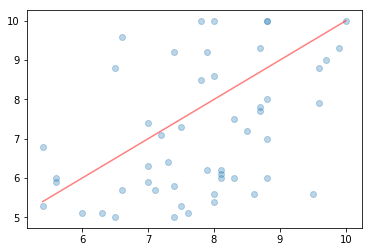

In [44]:
import matplotlib.pyplot as plt
x = res['media_final_x']
y = res['media_final_y']
plt.scatter(x, y, alpha=0.3)
plt.plot([min(x), max(x)], [min(x), max(x)], color='r', alpha=0.5)
plt.show()

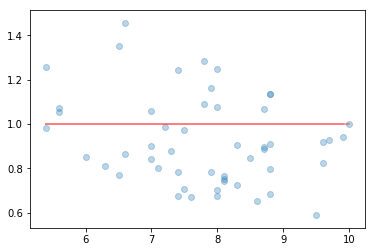

In [45]:
ratio = y / x
plt.scatter(x, ratio, alpha=0.3)
plt.plot(x, [1] * len(x), color='r', alpha=0.5)
plt.show()

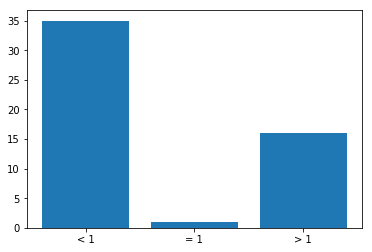

<1: 35
=1: 1
>1: 16


In [46]:
lt = ratio[ratio < 1].count()
eq = ratio[ratio == 1].count()
gt = ratio[ratio >= 1].count()
plt.bar([0, 1, 2], [lt, eq, gt])
plt.xticks([0, 1, 2], ['< 1', '= 1', '> 1'])
plt.show()

print('<1: ' + str(lt))
print('=1: ' + str(eq))
print('>1: ' + str(gt))

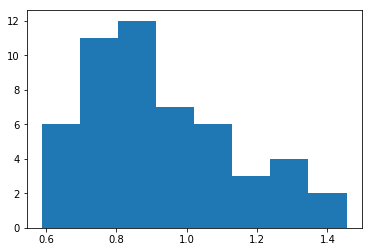

In [47]:
plt.hist(ratio, bins=8)
plt.show()

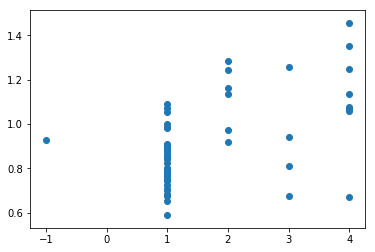

In [49]:
#analyse notes regarding time
plt.scatter(res['time_delta'], ratio)
plt.show()

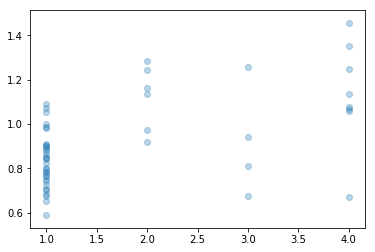

In [75]:
#removes invalid values
res = res[res['time_delta'] > 0]
x = res['media_final_x']
y = res['media_final_y']
ratio = y / x
plt.scatter(res['time_delta'], ratio, alpha=0.3)
plt.show()

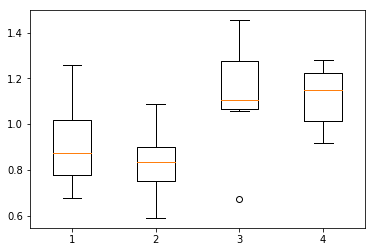

In [73]:
#organizes data for boxplot
boxes = []

for i in res['time_delta'].unique().tolist():
  mask = res['time_delta'] == i
  a = res[mask]
  boxes.append(a['media_final_y'] / a['media_final_x'])

plt.boxplot(boxes)
plt.show()